<a href="https://colab.research.google.com/github/Ashu-00/AutoEncodersAndGenerators/blob/main/Generative_MNIST_using_AutoEncoder(Sparse).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

In [ ]:
dataset=torchvision.datasets.MNIST('data',train=True,download=True,transform=torchvision.transforms.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 156981888.37it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 45031856.44it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 44085925.54it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 10636811.15it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
generator1 = torch.Generator().manual_seed(42)
trainset,testset=torch.utils.data.random_split(dataset,[0.9,0.1],generator=generator1)

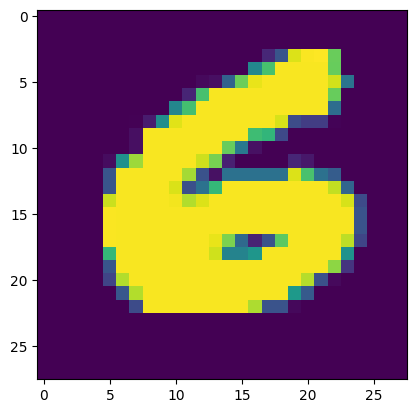

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(trainset[0][0].squeeze(0))

In [ ]:
class SparseAE(nn.Module):
  def __init__(self):
    super().__init__()

    self.enc1 = nn.Conv2d(1,8,3,stride=1)
    self.enc2 = nn.Conv2d(8,16,5,stride=1)
    self.enc3 = nn.Conv2d(16,32,5,stride=2)
    self.bottle = nn.MaxPool2d(2, 2)

    self.dec1 = nn.ConvTranspose2d(32,16,3, stride=2)
    self.dec2 = nn.ConvTranspose2d(16,8,5, stride=2)
    self.dec3 = nn.ConvTranspose2d(8,1,8, stride=1)

  def encoder(self,x):
    x=F.relu(self.enc1(x))
    x=F.relu(self.enc2(x))
    x=F.relu(self.enc3(x))
    x=self.bottle(x)
    return x

  def decoder(self,x):
    x=F.relu(self.dec1(x))
    x=F.relu(self.dec2(x))
    x=torch.sigmoid(self.dec3(x))
    return x


  def forward(self,x):
    x=self.encoder(x)
    x=self.decoder(x)
    return x

  def forwardwithlayers(self,x):
    layers=[]
    x1=F.relu(self.enc1(x))
    layers.append(x1)
    x2=F.relu(self.enc2(x1))
    layers.append(x2)
    x3=F.relu(self.enc3(x2))
    layers.append(x3)
    x4=self.bottle(x3)
    layers.append(x4)
    x5=F.relu(self.dec1(x4))
    layers.append(x5)
    x6=F.relu(self.dec2(x5))
    layers.append(x6)
    xans=torch.sigmoid(self.dec3(x6))
    return xans,layers


In [ ]:
def l1_reg(layers, lambda_=4e-5):
  loss = 0
  for i in layers:
    loss += torch.mean(torch.abs(i))

  return lambda_*loss

In [ ]:
def train(model,train_loader,epochs=3,lr=9e-3,device="cpu"):
  model.train()
  model.to(device)
  optimizer=optim.Adam(model.parameters(),lr=lr)
  lossfunc=nn.BCELoss()
  lossavg=0

  for epoch in range(epochs):
    for (bid,(inp,lab)) in enumerate(train_loader):
      inp=inp.to(device)
      optimizer.zero_grad()
      #lab=lab.to(device)
      out,layers=model.forwardwithlayers(inp)
      loss=lossfunc(out,inp)
      loss+=l1_reg(layers)
      loss.backward()
      optimizer.step()
      lossavg+=loss.item()
      if bid%10==0:
        print(f"epoch:{epoch} batch={bid} loss:{loss.item()}")

    print(f"epoch:{epoch} loss:{lossavg/len(train_loader)}")


In [ ]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=128,shuffle=True)
testloader=torch.utils.data.DataLoader(testset,batch_size=128,shuffle=False)

In [ ]:
model=SparseAE()
device=torch.device("cuda" if torch.cuda.is_available() else 'cpu')
train(model,trainloader,epochs=2,device=device)

epoch:0 batch=0 loss:0.7346805334091187
epoch:0 batch=10 loss:0.650163471698761
epoch:0 batch=20 loss:0.5803365111351013
epoch:0 batch=30 loss:0.47904908657073975
epoch:0 batch=40 loss:0.5792065262794495
epoch:0 batch=50 loss:0.3713313043117523
epoch:0 batch=60 loss:0.32430896162986755
epoch:0 batch=70 loss:0.26691383123397827
epoch:0 batch=80 loss:0.2344665229320526
epoch:0 batch=90 loss:0.20119281113147736
epoch:0 batch=100 loss:0.1947735846042633
epoch:0 batch=110 loss:0.18385377526283264
epoch:0 batch=120 loss:0.17649900913238525
epoch:0 batch=130 loss:0.1617802530527115
epoch:0 batch=140 loss:0.15678183734416962
epoch:0 batch=150 loss:0.1447834074497223
epoch:0 batch=160 loss:0.138907790184021
epoch:0 batch=170 loss:0.1294880509376526
epoch:0 batch=180 loss:0.13276244699954987
epoch:0 batch=190 loss:0.12945425510406494
epoch:0 batch=200 loss:0.12047890573740005
epoch:0 batch=210 loss:0.1221485584974289
epoch:0 batch=220 loss:0.12122651934623718
epoch:0 batch=230 loss:0.12064591795

KeyboardInterrupt: 

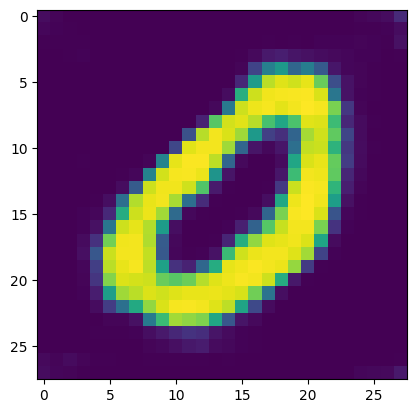

In [ ]:
#test1

img=testset[2][0].to(device).unsqueeze(0)
out=model(img)
plt.imshow(out.detach().cpu().squeeze(0)[0,:,:])


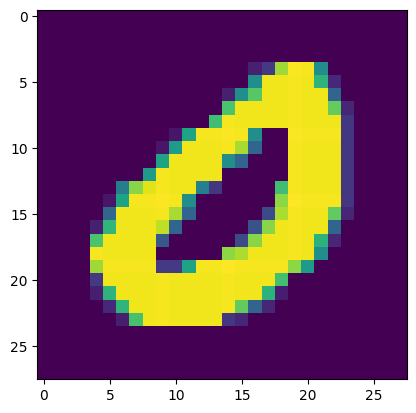

In [ ]:
plt.imshow(img.detach().cpu().squeeze(0)[0,:,:])

In [ ]:
def test(model,test_loader,device="cpu"):
  model.eval()
  model.to(device)
  lossfunc=nn.BCELoss()
  lossavg=0

  for (bid,(inp,lab)) in enumerate(test_loader):
      inp=inp.to(device)

      #lab=lab.to(device)
      out,layers=model.forwardwithlayers(inp)
      loss=lossfunc(out,inp)
      loss+=l1_reg(layers)
      lossavg+=loss.item()

      print(f"batch={bid} loss:{loss.item()}")

  print(f"loss Average:{lossavg/len(test_loader)}")

In [ ]:
test(model,testloader,device=device)

batch=0 loss:0.09825733304023743
batch=1 loss:0.10166682302951813
batch=2 loss:0.10116837918758392
batch=3 loss:0.09830772131681442
batch=4 loss:0.09583579003810883
batch=5 loss:0.0945015549659729
batch=6 loss:0.10312231630086899
batch=7 loss:0.0961381196975708
batch=8 loss:0.10021279752254486
batch=9 loss:0.10329338908195496
batch=10 loss:0.09609769284725189
batch=11 loss:0.09872013330459595
batch=12 loss:0.10017648339271545
batch=13 loss:0.10135772079229355
batch=14 loss:0.10231456160545349
batch=15 loss:0.10177243500947952
batch=16 loss:0.09996989369392395
batch=17 loss:0.0939868837594986
batch=18 loss:0.09966843575239182
batch=19 loss:0.10404444485902786
batch=20 loss:0.09768612682819366
batch=21 loss:0.09790600091218948
batch=22 loss:0.09703397005796432
batch=23 loss:0.09766897559165955
batch=24 loss:0.09984725713729858
batch=25 loss:0.09305423498153687
batch=26 loss:0.09592275321483612
batch=27 loss:0.09740911424160004
batch=28 loss:0.09581150114536285
batch=29 loss:0.09931363910

In [ ]:
def kl_reg(layers,rho=0.05,beta=0.005):
  loss=0
  for i in layers:
    loss+=F.kl_div(torch.mean(i,dim=0),rho*torch.ones_like(i[0]))
  return beta*torch.abs(loss)

In [ ]:
def trainoverKLreg(model,train_loader,epochs=3,lr=9e-3,device="cpu"):
  model.train()
  model.to(device)
  optimizer=optim.Adam(model.parameters(),lr=lr)
  lossfunc=nn.BCELoss()
  lossavg=0

  for epoch in range(epochs):
    for (bid,(inp,lab)) in enumerate(train_loader):
      inp=inp.to(device)
      optimizer.zero_grad()
      #lab=lab.to(device)
      out,layers=model.forwardwithlayers(inp)
      loss=lossfunc(out,inp)
      loss+=kl_reg(layers)
      loss.backward()
      optimizer.step()
      lossavg+=loss.item()
      if bid%10==0:
        print(f"epoch:{epoch} batch={bid} loss:{loss.item()}")

    print(f"epoch:{epoch} loss:{lossavg/len(train_loader)}")


In [ ]:
modelforklreg=SparseAE()
device=torch.device("cuda" if torch.cuda.is_available() else 'cpu')
#trainoverKLreg(modelforklreg,trainloader,epochs=1,device=device)

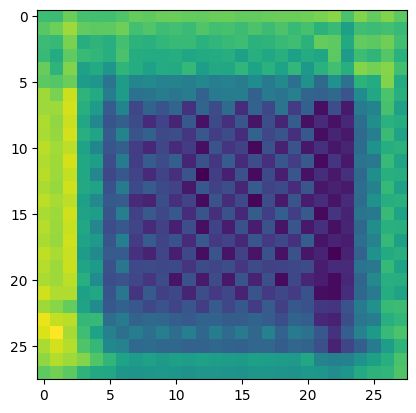

In [ ]:
#test1

img=testset[2][0].to(device).unsqueeze(0)
out=modelforklreg(img)
plt.imshow(out.detach().cpu().squeeze(0)[0,:,:])


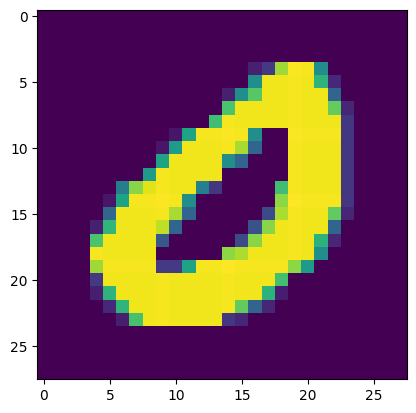

In [ ]:
plt.imshow(img.detach().cpu().squeeze(0)[0,:,:])

In [ ]:
def testoverkl(model,test_loader,device="cpu"):
  model.eval()
  model.to(device)
  lossfunc=nn.BCELoss()
  lossavg=0

  for (bid,(inp,lab)) in enumerate(test_loader):
      inp=inp.to(device)

      #lab=lab.to(device)
      out,layers=model.forwardwithlayers(inp)
      loss=lossfunc(out,inp)
      loss+=kl_reg(layers)
      lossavg+=loss.item()

      print(f"batch={bid} loss:{loss.item()}")

  print(f"loss Average:{lossavg/len(test_loader)}")

In [ ]:
test(modelforklreg,testloader,device=device)

batch=0 loss:0.6813063025474548
batch=1 loss:0.6809766888618469
batch=2 loss:0.6809686422348022
batch=3 loss:0.68108731508255
batch=4 loss:0.6804786920547485
batch=5 loss:0.6807103157043457
batch=6 loss:0.6812202334403992
batch=7 loss:0.6808823943138123
batch=8 loss:0.6806308627128601
batch=9 loss:0.6810214519500732
batch=10 loss:0.6805139183998108
batch=11 loss:0.6806833148002625
batch=12 loss:0.6810294389724731
batch=13 loss:0.6811744570732117
batch=14 loss:0.6809998750686646
batch=15 loss:0.6809939742088318
batch=16 loss:0.6807049512863159
batch=17 loss:0.6805238723754883
batch=18 loss:0.6812883019447327
batch=19 loss:0.6815454363822937
batch=20 loss:0.6806833148002625
batch=21 loss:0.680898129940033
batch=22 loss:0.6814473271369934
batch=23 loss:0.6809667348861694
batch=24 loss:0.680898904800415
batch=25 loss:0.6804986000061035
batch=26 loss:0.6808652281761169
batch=27 loss:0.6810388565063477
batch=28 loss:0.680804967880249
batch=29 loss:0.6813915967941284
batch=30 loss:0.680756628

In [ ]:
torch.save(model.state_dict(),'model.pth')
torch.save(modelforklreg.state_dict(),'modelforklreg.pth')

In [ ]:
trainset[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
_,layers=model.forwardwithlayers(img)

In [ ]:
for i in layers:
  print(i.shape)

torch.Size([1, 8, 26, 26])
torch.Size([1, 16, 22, 22])
torch.Size([1, 32, 9, 9])
torch.Size([1, 32, 4, 4])
torch.Size([1, 16, 9, 9])
torch.Size([1, 8, 21, 21])


In [ ]:
for param in model.parameters():
  param.requires_grad=False

In [ ]:
class labelenc(nn.Module):
  def __init__(self):
    super().__init__()
    self.up = nn.Sequential(
            nn.ConvTranspose2d(10, 16, kernel_size=3, stride=2, padding=0), # (16, 2, 2)
            nn.ConvTranspose2d(16, 32, kernel_size=2, stride=1, padding=0), # (32, 4, 4)
        )
  def forward(self,x):

    x=self.up(x)
    return x

In [110]:
def trainforgen(modellabel,modeldec,train_loader,epochs=3,lr=0.001,device="cpu"):
  modellabel.train()
  modellabel.to(device)
  modeldec.eval()
  modeldec.to(device)
  optimizer=optim.Adam(modellabel.parameters(),lr=lr)
  lossfunc=nn.MSELoss()
  lossavg=0

  for epoch in range(epochs):
    for (bid,(inp,lab)) in enumerate(train_loader):
      inp=inp.to(device)
      optimizer.zero_grad()
      lab=lab.to(device)
      batch_size = lab.size(0)
      one_hot = torch.zeros(batch_size, 10, 1, 1, dtype=torch.float32, device=device)
      one_hot.scatter_(1, lab.view(-1, 1, 1, 1), 1)
      #print(one_hot[0,:,:,:])

      enc=modellabel(one_hot)
      #print(enc.shape)
      out=modeldec.encoder(inp)

      #print(out.shape)
      #print(enc.shape)

      loss=lossfunc(enc,out)
      loss.backward()
      optimizer.step()
      lossavg+=loss.item()
      if bid%10==0:
        print(f"epoch:{epoch} batch={bid} loss:{loss.item()}")

    print(f"epoch:{epoch} loss:{lossavg/((epoch+1) * len(train_loader))}")


In [111]:
modelforenc=labelenc()

In [123]:
newtrainloader=torch.utils.data.DataLoader(trainset,batch_size=128,shuffle=True)

In [124]:
device=torch.device("cuda" if torch.cuda.is_available() else 'cpu')
trainforgen(modelforenc,model,newtrainloader,epochs=10,device=device)

epoch:0 batch=0 loss:0.0436556413769722
epoch:0 batch=10 loss:0.044273313134908676
epoch:0 batch=20 loss:0.046322617679834366
epoch:0 batch=30 loss:0.040897730737924576
epoch:0 batch=40 loss:0.042505476623773575
epoch:0 batch=50 loss:0.04551776126027107
epoch:0 batch=60 loss:0.044255297631025314
epoch:0 batch=70 loss:0.04356555640697479
epoch:0 batch=80 loss:0.04245081543922424
epoch:0 batch=90 loss:0.042371805757284164
epoch:0 batch=100 loss:0.0413791760802269
epoch:0 batch=110 loss:0.04265811666846275
epoch:0 batch=120 loss:0.040628258138895035
epoch:0 batch=130 loss:0.04262005165219307
epoch:0 batch=140 loss:0.04263034462928772
epoch:0 batch=150 loss:0.04282480478286743
epoch:0 batch=160 loss:0.04081512987613678
epoch:0 batch=170 loss:0.04187946021556854
epoch:0 batch=180 loss:0.04205167666077614
epoch:0 batch=190 loss:0.03985815867781639
epoch:0 batch=200 loss:0.037102676928043365
epoch:0 batch=210 loss:0.040814246982336044
epoch:0 batch=220 loss:0.04085560515522957
epoch:0 batch=2

In [125]:
torch.save(modelforenc.state_dict(),'modelforencfinal.pth')

In [126]:
def runr(lab,modelforencc=modelforenc,modelfordecc=model):
  x=torch.zeros(10)
  x[lab]=1
  x=x.view(10,1,1)
  x=x.to(device)
  x=x.unsqueeze(0)
  #print(x)

  modelforencc.eval()
  modelfordecc.eval()

  enc=modelforencc(x)
  out=modelfordecc.decoder(enc)
  return out


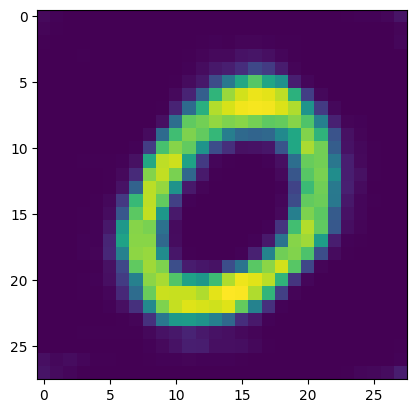

In [129]:
out=runr(0)
plt.imshow(out.detach().cpu().squeeze(0,1))

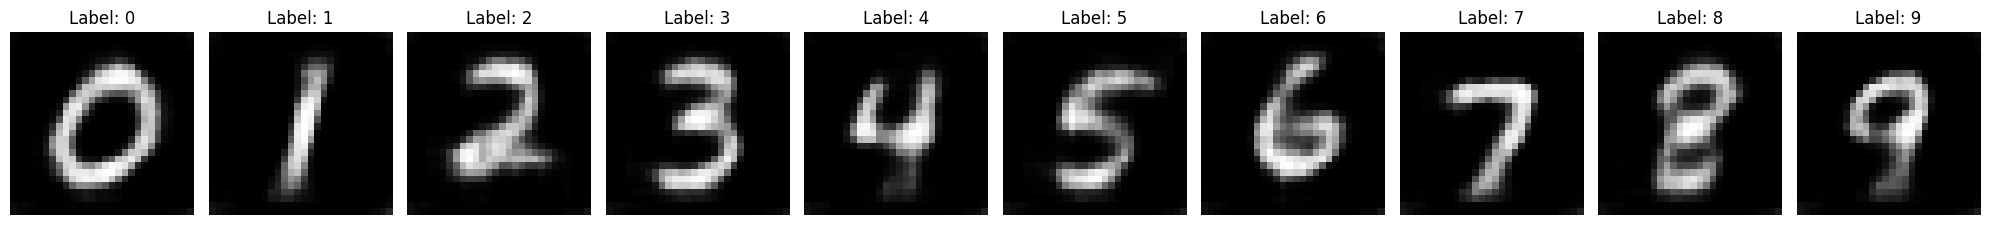

In [132]:
plt.figure(figsize=(20, 4))
for i in range(10):
    ax = plt.subplot(1, 10, i+1)
    out=runr(i)
    plt.imshow(out.detach().cpu().squeeze(0,1),cmap='gray')
    ax.set_title(f"Label: {i}")
    plt.axis('off')
plt.tight_layout()
plt.show()